In [96]:
import pandas as pd
import numpy as np
from clases.Trainer import Trainer
from clases.NeuronalNetwork import NeuronalNetwork
from clases.ActivationFunction import *
from clases.Optimizer import *
from clases.LossFunction import *
from clases.Test import *

import warnings
warnings.filterwarnings("ignore")

## MNIST Data

### Load Data

In [97]:
# URL: https://www.kaggle.com/datasets/animatronbot/mnist-digit-recognizer
data = pd.read_csv('../datos/mnist_data.csv')
data = np.array(data)

### Split Data

In [98]:
m, n = data.shape
np.random.shuffle(data)

test_size = int(0.1 * m)
data_test = data[:test_size, :].T  # El 10% inicial para el conjunto de prueba

# El conjunto provisional restante (90%)
remaining_data = data[test_size:, :]

train_size = int(0.8 * m)
data_train = remaining_data[:train_size, :].T  # El siguiente 80% para entrenamiento
data_validation = remaining_data[train_size:, :].T  # El resto 10% para validación

X_train, Y_train = data_train[1:].T, data_train[0]
X_val, Y_val = data_validation[1:].T, data_validation[0]
X_test, Y_test = data_test[1:].T, data_test[0]

Y_train = np.eye(10)[Y_train]
Y_val = np.eye(10)[Y_val]
Y_test = np.eye(10)[Y_test]

# Normalización
X_train = X_train / 255
X_val = X_val / 255
X_test = X_test / 255

### Train Data

#### Setup NN

In [99]:
layers_config = [
    {'output_size': 784, 'activation': ReLU},
    {'output_size': 10, 'activation': Softmax}
]

nn = NeuronalNetwork(784, layers_config)

#### SGD Optimizer

In [100]:
optimizer = SGDOptimizer(learning_rate=0.1)
trainer = Trainer(nn, optimizer, cross_entropy_loss, cross_entropy_loss_grad)
loss, acc = trainer.train(X_train, Y_train,X_val,Y_val, epochs=130, print_every=10)

-------------------------------------------------------------------
| Epoch 10 | time:  1.40s | val loss 0.230 | valid accuracy 0.670 |
-------------------------------------------------------------------
| Epoch 20 | time:  1.33s | val loss 0.174 | valid accuracy 0.771 |
-------------------------------------------------------------------
| Epoch 30 | time:  1.34s | val loss 0.144 | valid accuracy 0.808 |
-------------------------------------------------------------------
| Epoch 40 | time:  1.35s | val loss 0.127 | valid accuracy 0.826 |
-------------------------------------------------------------------
| Epoch 50 | time:  1.34s | val loss 0.115 | valid accuracy 0.839 |
-------------------------------------------------------------------
| Epoch 60 | time:  1.31s | val loss 0.107 | valid accuracy 0.846 |
-------------------------------------------------------------------
| Epoch 70 | time:  1.32s | val loss 0.101 | valid accuracy 0.850 |
------------------------------------------------

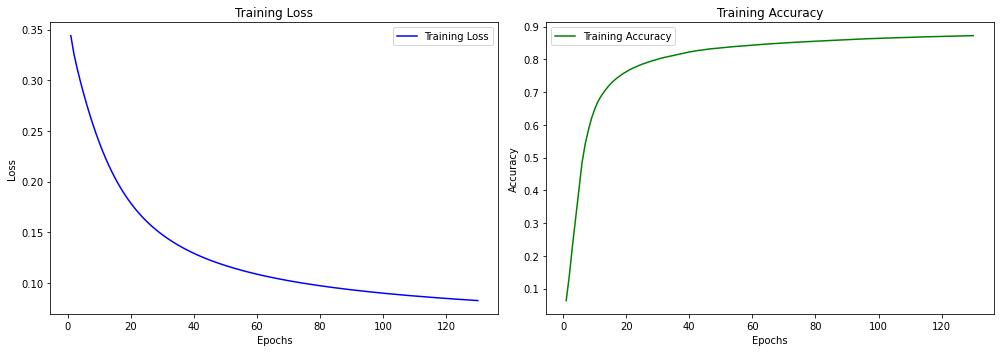

In [101]:
plot_training_history(loss, acc)

In [102]:
# Haz pruebas para el conjunto de prueba
Y_pred = predict(nn, X_test)
accuracy = evaluate(Y_pred, Y_test)

print(f"Accuracy: {accuracy}")

Accuracy: 0.8685714285714285


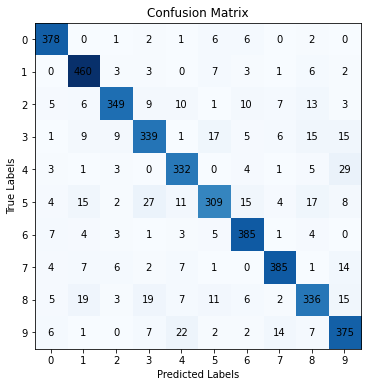

In [103]:
confusion_matrix(Y_test, Y_pred, class_labels=range(10))

#### Setup NN

In [104]:
layers_config = [
    {'output_size': 784, 'activation': ReLU},
    {'output_size': 10, 'activation': Softmax}
]

nn = NeuronalNetwork(784, layers_config)

#### Adam Optimizer

In [105]:
optimizer = AdamOptimizer(learning_rate=0.02)
trainer = Trainer(nn, optimizer, cross_entropy_loss, cross_entropy_loss_grad)
loss, acc = trainer.train(X_train, Y_train,X_val,Y_val, epochs=130, print_every=10)

-------------------------------------------------------------------
| Epoch 10 | time:  1.29s | val loss 0.075 | valid accuracy 0.866 |
-------------------------------------------------------------------
| Epoch 20 | time:  1.29s | val loss 0.058 | valid accuracy 0.898 |
-------------------------------------------------------------------
| Epoch 30 | time:  1.29s | val loss 0.052 | valid accuracy 0.912 |
-------------------------------------------------------------------
| Epoch 40 | time:  1.28s | val loss 0.048 | valid accuracy 0.918 |
-------------------------------------------------------------------
| Epoch 50 | time:  1.29s | val loss 0.046 | valid accuracy 0.920 |
-------------------------------------------------------------------
| Epoch 60 | time:  1.31s | val loss 0.045 | valid accuracy 0.922 |
-------------------------------------------------------------------
| Epoch 70 | time:  1.30s | val loss 0.044 | valid accuracy 0.925 |
------------------------------------------------

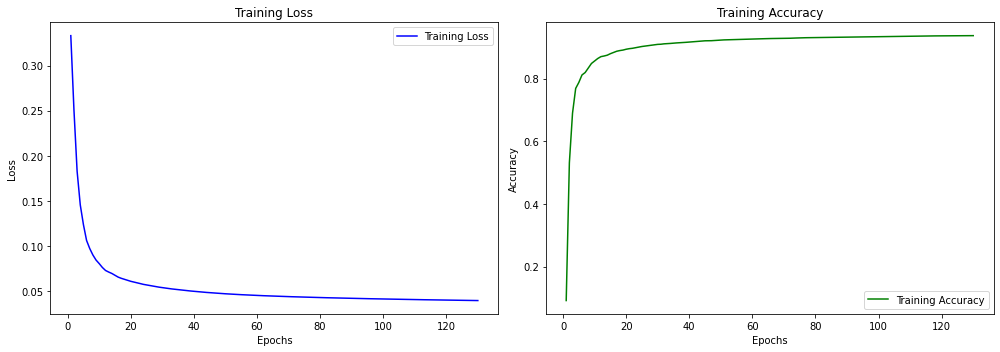

In [106]:
plot_training_history(loss, acc)

In [107]:
# Haz pruebas para el conjunto de prueba
Y_pred = predict(nn, X_test)
accuracy = evaluate(Y_pred, Y_test)

print(f"Accuracy: {accuracy}")

Accuracy: 0.9285714285714286


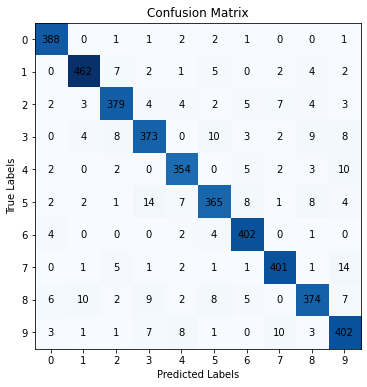

In [108]:
confusion_matrix(Y_test, Y_pred, class_labels=range(10))

## Fashion MNIST Data

### Load Data

In [109]:
# URL: https://www.kaggle.com/datasets/zalando-research/fashionmnist/data
data1 = pd.read_csv('../datos/fashion-mnist_train.csv')
data2 = pd.read_csv('../datos/fashion-mnist_test.csv')
data = pd.concat([data1, data2])
data = np.array(data)

In [110]:
labels = ["Tshirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

### Split Data

In [111]:
m, n = data.shape
np.random.shuffle(data)

test_size = int(0.1 * m)
data_test = data[:test_size, :].T  # El 10% inicial para el conjunto de prueba

# El conjunto provisional restante (90%)
remaining_data = data[test_size:, :]

train_size = int(0.8 * m)
data_train = remaining_data[:train_size, :].T  # El siguiente 80% para entrenamiento
data_validation = remaining_data[train_size:, :].T  # El resto 10% para validación

X_train, Y_train = data_train[1:].T, data_train[0]
X_val, Y_val = data_validation[1:].T, data_validation[0]
X_test, Y_test = data_test[1:].T, data_test[0]

Y_train = np.eye(10)[Y_train]
Y_val = np.eye(10)[Y_val]
Y_test = np.eye(10)[Y_test]

# Normalización
X_train = X_train / 255
X_val = X_val / 255
X_test = X_test / 255

### Train Data

#### Setup NN

In [112]:
layers_config = [
    {'output_size': 784, 'activation': ReLU},
    {'output_size': 10, 'activation': Softmax}
]

nn = NeuronalNetwork(784, layers_config)

#### SGD Optimizer

In [113]:
optimizer = SGDOptimizer(learning_rate=0.1)
trainer = Trainer(nn, optimizer, cross_entropy_loss, cross_entropy_loss_grad)
loss, acc = trainer.train(X_train, Y_train,X_val,Y_val, epochs=130, print_every=10)

-------------------------------------------------------------------
| Epoch 10 | time:  2.34s | val loss 0.196 | valid accuracy 0.641 |
-------------------------------------------------------------------
| Epoch 20 | time:  2.56s | val loss 0.162 | valid accuracy 0.675 |
-------------------------------------------------------------------
| Epoch 30 | time:  2.23s | val loss 0.149 | valid accuracy 0.675 |
-------------------------------------------------------------------
| Epoch 40 | time:  2.21s | val loss 0.140 | valid accuracy 0.704 |
-------------------------------------------------------------------
| Epoch 50 | time:  2.20s | val loss 0.133 | valid accuracy 0.728 |
-------------------------------------------------------------------
| Epoch 60 | time:  2.22s | val loss 0.128 | valid accuracy 0.744 |
-------------------------------------------------------------------
| Epoch 70 | time:  2.25s | val loss 0.124 | valid accuracy 0.753 |
------------------------------------------------

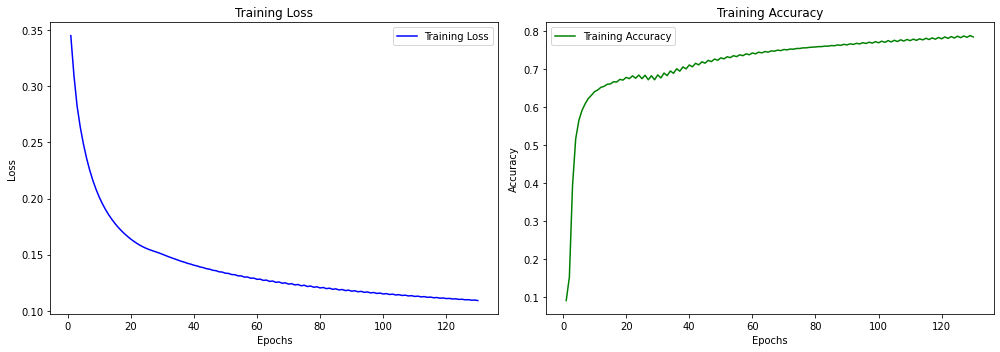

In [114]:
plot_training_history(loss, acc)

In [115]:
# Haz pruebas para el conjunto de prueba
Y_pred = predict(nn, X_test)
accuracy = evaluate(Y_pred, Y_test)

print(f"Accuracy: {accuracy}")

Accuracy: 0.7877142857142857


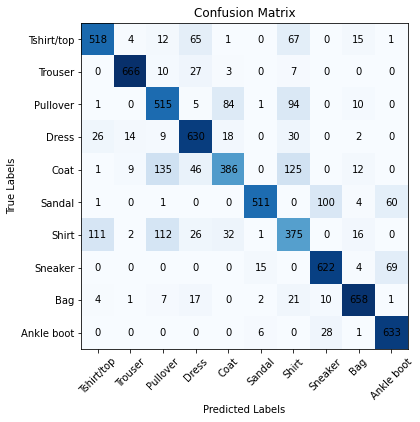

In [116]:
confusion_matrix(Y_test, Y_pred, class_labels=labels, inclain=True)

#### Setup NN

In [117]:
layers_config = [
    {'output_size': 784, 'activation': ReLU},
    {'output_size': 10, 'activation': Softmax}
]

nn = NeuronalNetwork(784, layers_config)

#### Adam Optimizer

In [118]:
optimizer = AdamOptimizer(learning_rate=0.02)
trainer = Trainer(nn, optimizer, cross_entropy_loss, cross_entropy_loss_grad)
loss, acc = trainer.train(X_train, Y_train,X_val,Y_val, epochs=130, print_every=10)

-------------------------------------------------------------------
| Epoch 10 | time:  2.06s | val loss 0.225 | valid accuracy 0.568 |
-------------------------------------------------------------------
| Epoch 20 | time:  2.05s | val loss 0.115 | valid accuracy 0.760 |
-------------------------------------------------------------------
| Epoch 30 | time:  2.06s | val loss 0.107 | valid accuracy 0.782 |
-------------------------------------------------------------------
| Epoch 40 | time:  2.05s | val loss 0.094 | valid accuracy 0.810 |
-------------------------------------------------------------------
| Epoch 50 | time:  2.01s | val loss 0.088 | valid accuracy 0.825 |
-------------------------------------------------------------------
| Epoch 60 | time:  1.96s | val loss 0.085 | valid accuracy 0.831 |
-------------------------------------------------------------------
| Epoch 70 | time:  1.96s | val loss 0.082 | valid accuracy 0.834 |
------------------------------------------------

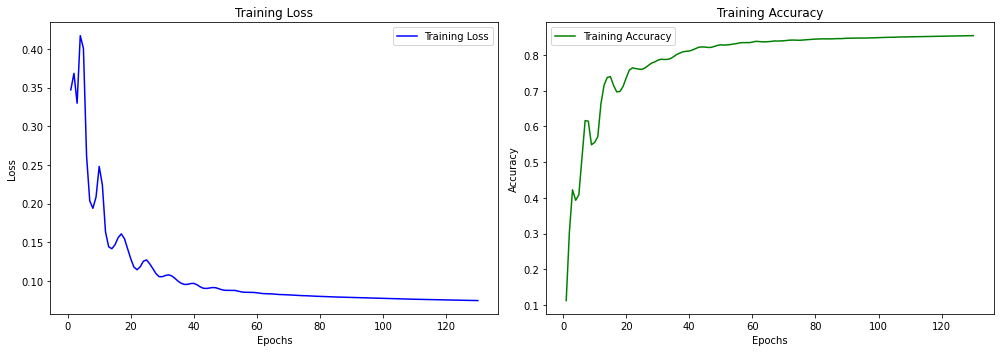

In [119]:
plot_training_history(loss, acc)

In [120]:
# Haz pruebas para el conjunto de prueba
Y_pred = predict(nn, X_test)
accuracy = evaluate(Y_pred, Y_test)

print(f"Accuracy: {accuracy}")

Accuracy: 0.85


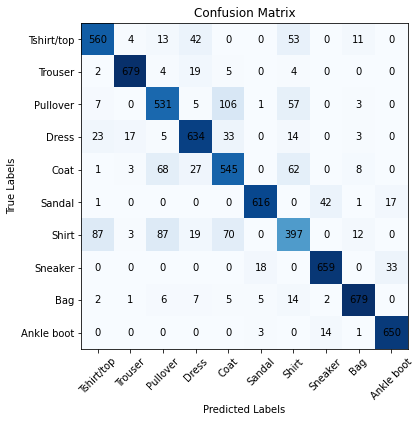

In [121]:
confusion_matrix(Y_test, Y_pred, class_labels=labels, inclain=True)